## Import Libraries..!!

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
%matplotlib inline

## Read dataset from csv file..!!

In [2]:
titanic_data = pd.read_csv('titanic_train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

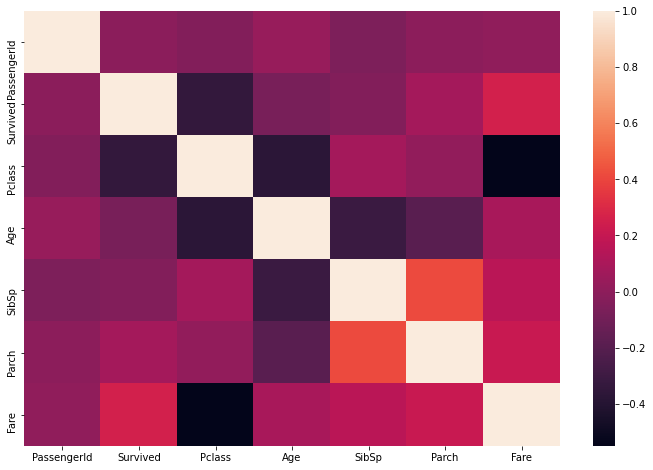

In [6]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(titanic_data.corr())

In [7]:
titanic_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
titanic_data.shape

(891, 12)

In [9]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Exploratory Data Analysis (EDA)..!!
### Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data..!!
### We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

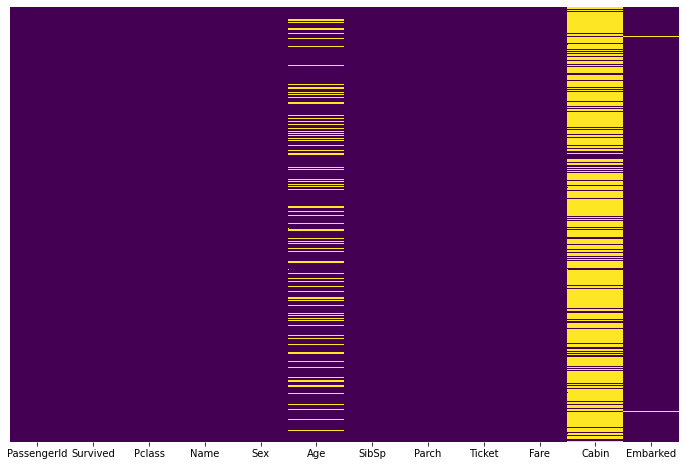

In [10]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(titanic_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

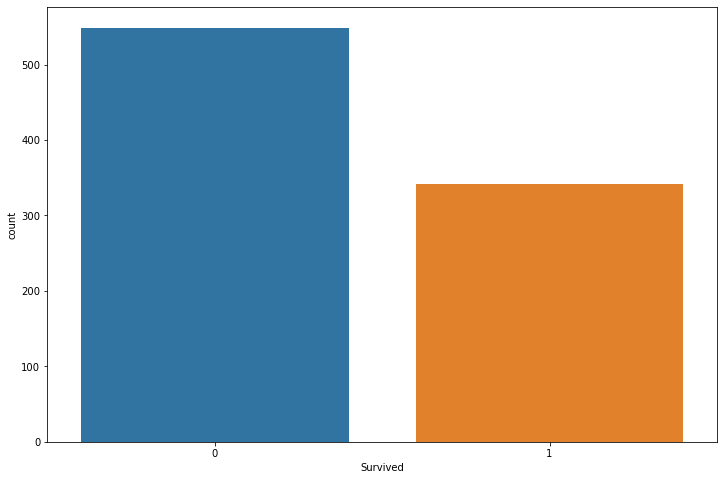

In [11]:
fig = plt.figure(figsize = (12, 8))
sns.countplot(x = 'Survived', data = titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

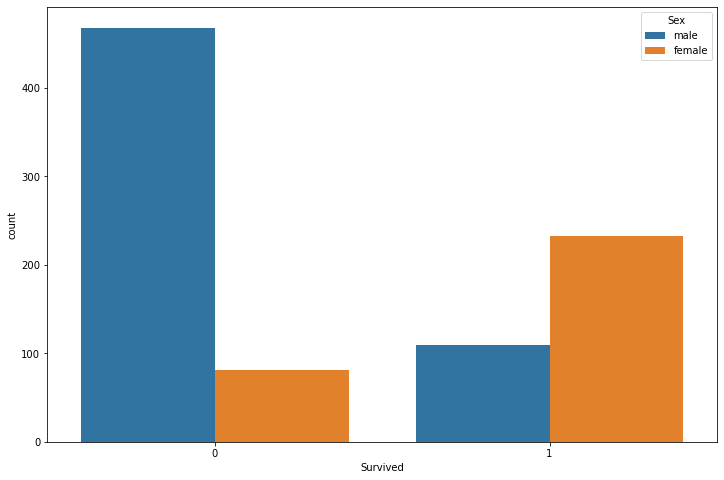

In [12]:
fig = plt.figure(figsize = (12, 8))
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

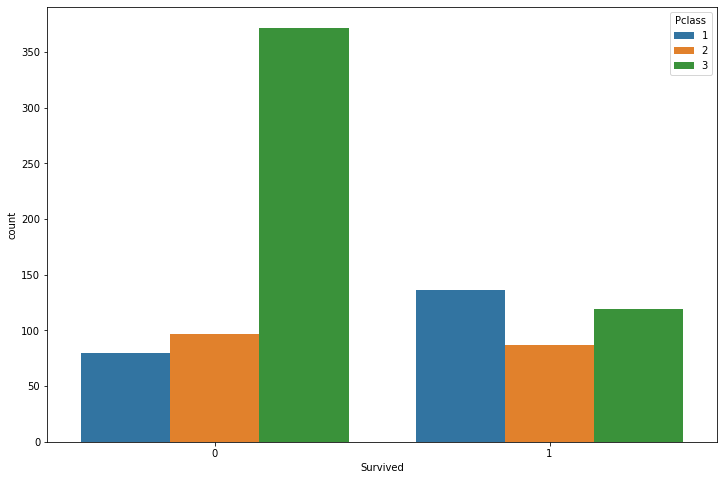

In [13]:
fig = plt.figure(figsize = (12, 8))
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic_data)

G:\MyPython3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

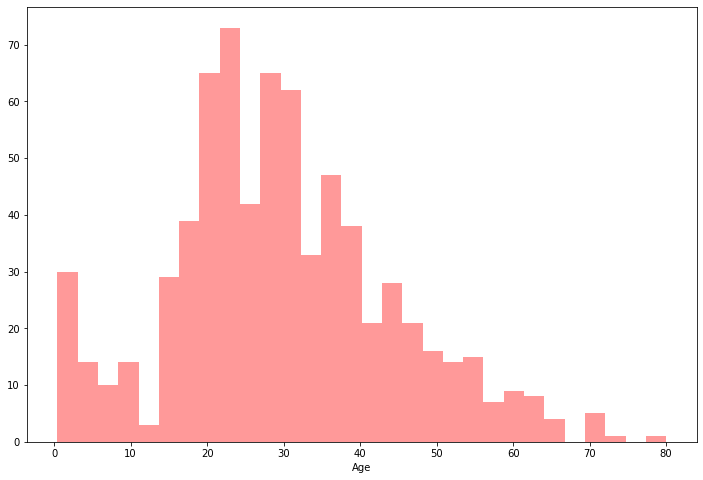

In [14]:
fig = plt.figure(figsize = (12, 8))
sns.distplot(titanic_data['Age'].dropna(), kde = False, color = 'red', bins = 30)

<AxesSubplot:>

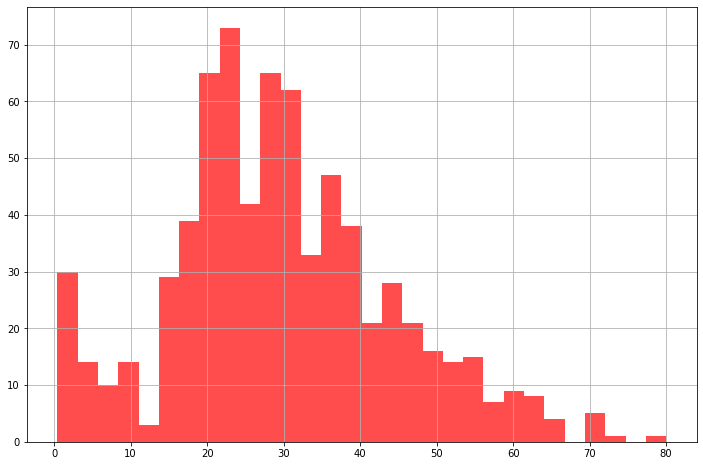

In [15]:
fig = plt.figure(figsize = (12, 8))
titanic_data['Age'].hist(bins = 30, color = 'red', alpha = 0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

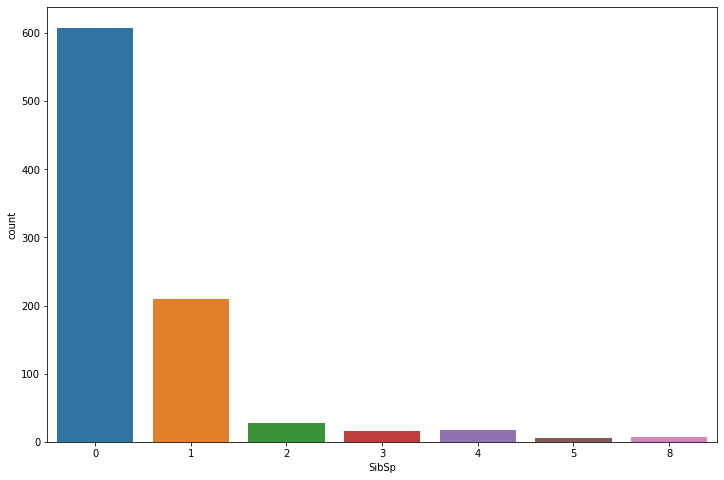

In [16]:
fig = plt.figure(figsize = (12, 8))
sns.countplot(x = 'SibSp', data = titanic_data)

## Cufflinks for plots..!!

In [17]:
import cufflinks as cf

In [18]:
cf.go_offline()

In [19]:
titanic_data['Age'].iplot(kind = 'hist', bins = 30, color = 'red')

In [20]:
titanic_data['Fare'].iplot(kind = 'hist', bins = 30, color = 'red')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

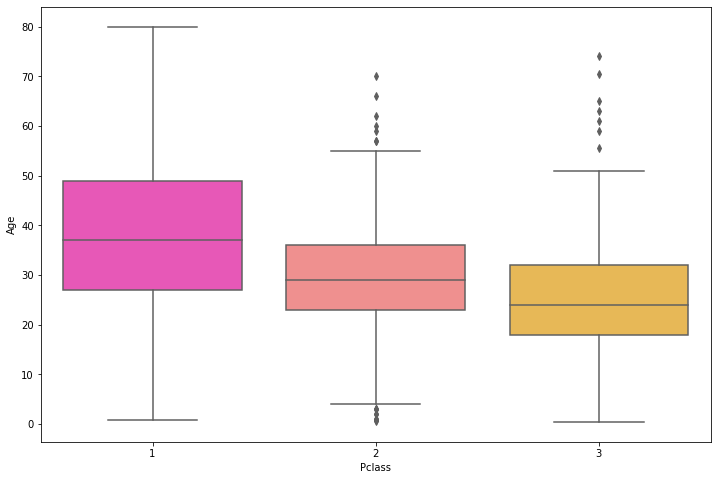

In [21]:
fig = plt.figure(figsize = (12, 8))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_data, palette = 'spring')

### We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [22]:
def age(temp):
    age = temp[0]
    p_class = temp[1]
    
    if pd.isnull(age):
        if p_class == 1:
            return 35
        elif p_class == 2:
            return 27
        else:
            return 25
    else:
        return age

### Now apply that function..!!

In [23]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age, axis = 1)

### Now let's check that heat map again.!!

<AxesSubplot:>

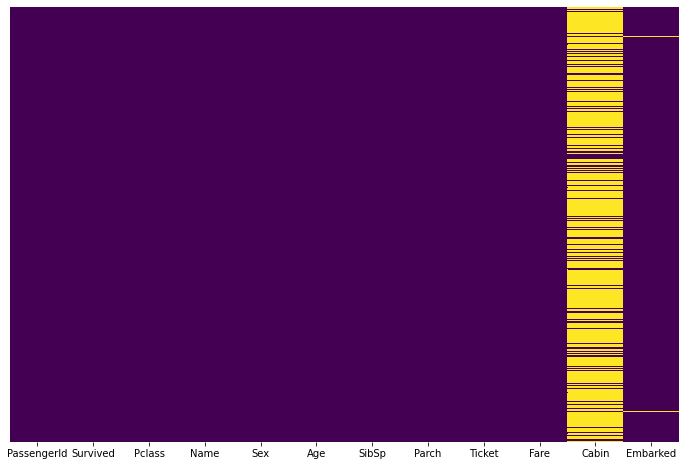

In [24]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(titanic_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

### Now, drop the Cabin column from the dataset..!!

In [25]:
titanic_data.drop('Cabin', axis = 1, inplace = True)

### Again, check the heatmap of dataset..!!

<AxesSubplot:>

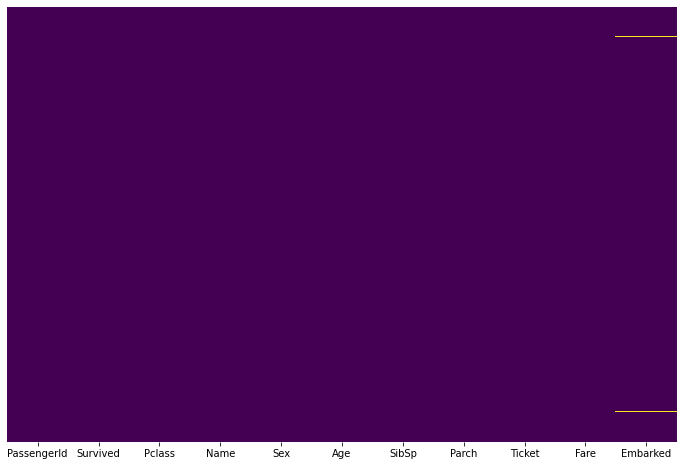

In [26]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(titanic_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [27]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Now, drop all the NaN values from the dataset..!!

In [28]:
titanic_data.dropna(inplace = True)

### Again, check the heatmap of dataset..!!

<AxesSubplot:>

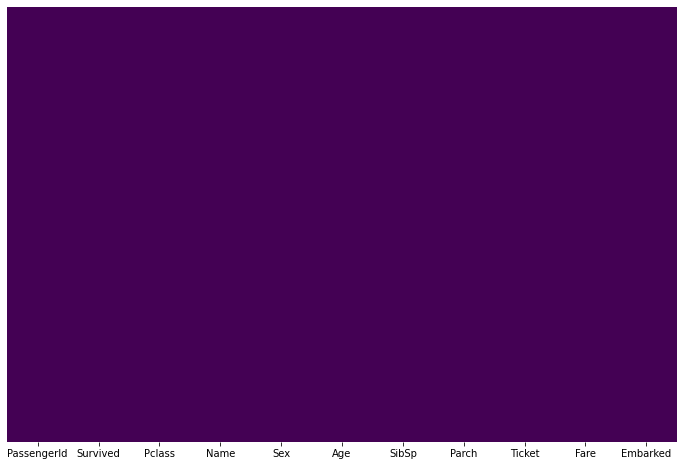

In [29]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(titanic_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

## Data Cleaning is Complete..!!

## Finally, data is clean and now convert categorical data..!!

In [30]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [31]:
new_sex_col = pd.get_dummies(titanic_data['Sex'], drop_first = True)
new_embark_col = pd.get_dummies(titanic_data['Embarked'], drop_first = True)

In [32]:
titanic_data = titanic_data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1)

In [33]:
titanic_data = pd.concat([titanic_data, new_sex_col, new_embark_col], axis = 1)

In [34]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [35]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
male             uint8
Q                uint8
S                uint8
dtype: object

### Now, our data is ready for our model..!!

In [36]:
x = titanic_data.drop('Survived', axis = 1)
y = titanic_data['Survived']

### Now, split data into train test split. Training Data = 80%, Test Data = 20%..!!

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 45)

## Now, Building a Logistic Regression Model..!!

In [38]:
logistic_model = LogisticRegression()

### Training our Model..!!

In [39]:
logistic_model.fit(x_train, y_train)

G:\MyPython3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

### Making predictions to our Model..!!

In [40]:
y_pred = logistic_model.predict(x_test)

### Now, Do Evaluation of our Model..!!

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       117
           1       0.67      0.54      0.60        61

    accuracy                           0.75       178
   macro avg       0.73      0.70      0.71       178
weighted avg       0.75      0.75      0.75       178



## Plot our data..!!

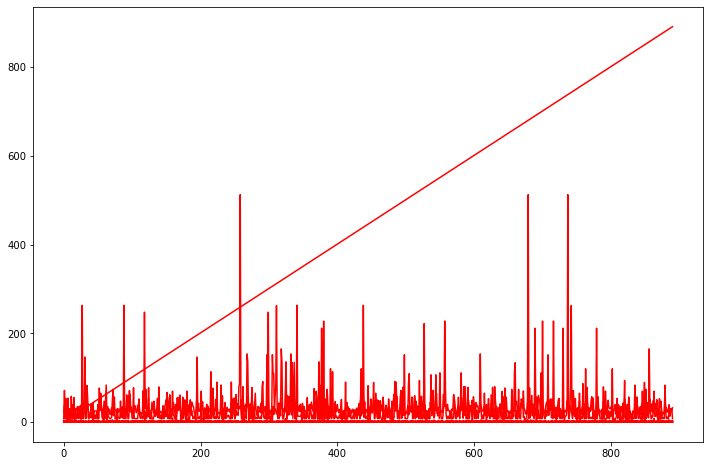

In [42]:
fig = plt.figure(figsize = (12, 8))
plt.plot(titanic_data, color = 'red')

## Bar Plot our data..!!

In [43]:
titanic_data.iplot(kind = 'bar', bins = 30, color = 'red')

## Histogram Plot our data..!!

In [44]:
titanic_data.iplot(kind = 'hist', bins = 30, color = 'blue')

In [45]:
train_accuracy = logistic_model.score(x_train, y_train)

In [46]:
print('Accuracy of our Training Model:', train_accuracy * 100, '%')

Accuracy of our Training Model: 80.30942334739804 %


In [47]:
test_accuracy = logistic_model.score(x_test, y_test)

In [48]:
print('Accuracy of our Test Model:', test_accuracy * 100, '%')

Accuracy of our Test Model: 75.28089887640449 %


# THE END..!!